<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.929948,42.133921,0.004773,93.068643,93.051863,0.016780
1,0.0,1.0,85.314006,91.559577,-0.010284,186.863299,186.874533,-0.011234
2,0.0,2.0,26.557696,81.760496,0.006870,118.325062,118.317497,0.007565
3,0.0,3.0,83.564337,28.075123,0.013878,121.653338,121.622746,0.030592
4,0.0,4.0,89.157645,39.031461,0.005218,138.194325,138.175343,0.018982
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,69.326292,69.690534,0.033777,149.050603,149.019043,0.031560
19996,999.0,16.0,99.695366,79.790800,0.007291,189.493457,189.490258,0.003199
19997,999.0,17.0,82.564959,29.219518,0.041081,121.825558,121.795469,0.030089
19998,999.0,18.0,40.053877,76.227625,-0.018818,126.262684,126.279028,-0.016344


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.929948  42.133921  0.004773   93.068643   93.051863  0.016780
      1.0    85.314006  91.559577 -0.010284  186.863299  186.874533 -0.011234
      2.0    26.557696  81.760496  0.006870  118.325062  118.317497  0.007565
      3.0    83.564337  28.075123  0.013878  121.653338  121.622746  0.030592
      4.0    89.157645  39.031461  0.005218  138.194325  138.175343  0.018982
...                ...        ...       ...         ...         ...       ...
999.0 15.0   69.326292  69.690534  0.033777  149.050603  149.019043  0.031560
      16.0   99.695366  79.790800  0.007291  189.493457  189.490258  0.003199
      17.0   82.564959  29.219518  0.041081  121.825558  121.795469  0.030089
      18.0   40.053877  76.227625 -0.018818  126.262684  126.279028 -0.016344
      19.0   73.570920  24.261325  0.028223  107.860468  107.843030  0.017437

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.929948  42.133921  0.004773   93.068643   93.051863  0.016780
      1.0    85.314006  91.559577 -0.010284  186.863299  186.874533 -0.011234
      2.0    26.557696  81.760496  0.006870  118.325062  118.317497  0.007565
      3.0    83.564337  28.075123  0.013878  121.653338  121.622746  0.030592
      4.0    89.157645  39.031461  0.005218  138.194325  138.175343  0.018982
...                ...        ...       ...         ...         ...       ...
999.0 15.0   69.326292  69.690534  0.033777  149.050603  149.019043  0.031560
      16.0   99.695366  79.790800  0.007291  189.493457  189.490258  0.003199
      17.0   82.564959  29.219518  0.041081  121.825558  121.795469  0.030089
      18.0   40.053877  76.227625 -0.018818  126.262684  126.279028 -0.016344
      19.0   73.570920  24.261325  0.028223  107.860468  107.843030  0.017437

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,40.929948,42.133921,0.004773,93.068643,93.051863,0.016780
1,0.0,1.0,85.314006,91.559577,-0.010284,186.863299,186.874533,-0.011234
2,0.0,2.0,26.557696,81.760496,0.006870,118.325062,118.317497,0.007565
3,0.0,3.0,83.564337,28.075123,0.013878,121.653338,121.622746,0.030592
4,0.0,4.0,89.157645,39.031461,0.005218,138.194325,138.175343,0.018982
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,69.326292,69.690534,0.033777,149.050603,149.019043,0.031560
19996,999.0,16.0,99.695366,79.790800,0.007291,189.493457,189.490258,0.003199
19997,999.0,17.0,82.564959,29.219518,0.041081,121.825558,121.795469,0.030089
19998,999.0,18.0,40.053877,76.227625,-0.018818,126.262684,126.279028,-0.016344


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    40.929948  42.133921  0.004773   93.068643   93.051863  0.016780
      1.0    85.314006  91.559577 -0.010284  186.863299  186.874533 -0.011234
      2.0    26.557696  81.760496  0.006870  118.325062  118.317497  0.007565
      3.0    83.564337  28.075123  0.013878  121.653338  121.622746  0.030592
      4.0    89.157645  39.031461  0.005218  138.194325  138.175343  0.018982
...                ...        ...       ...         ...         ...       ...
999.0 15.0   69.326292  69.690534  0.033777  149.050603  149.019043  0.031560
      16.0   99.695366  79.790800  0.007291  189.493457  189.490258  0.003199
      17.0   82.564959  29.219518  0.041081  121.825558  121.795469  0.030089
      18.0   40.053877  76.227625 -0.018818  126.262684  126.279028 -0.016344
      19.0   73.570920  24.261325  0.028223  107.860468  107.843030  0.017437

[20000 rows x 6 columns]

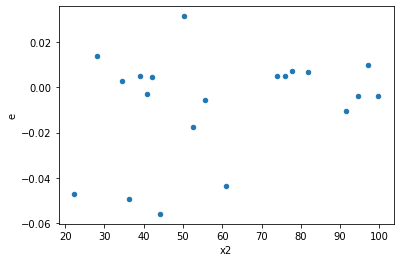

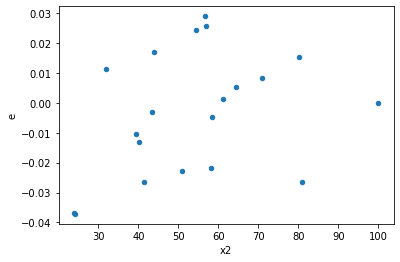

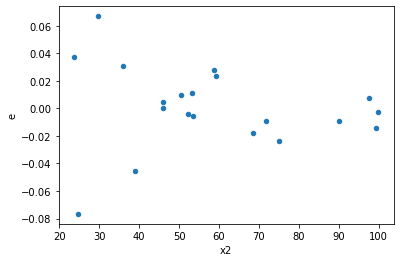

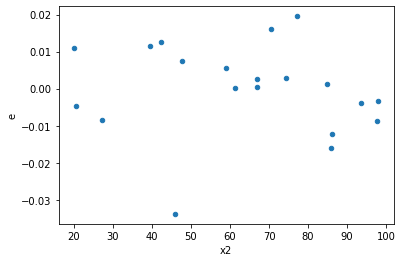

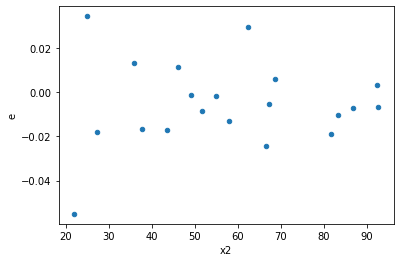

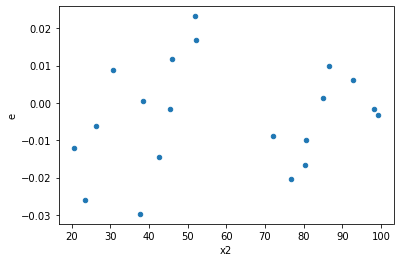

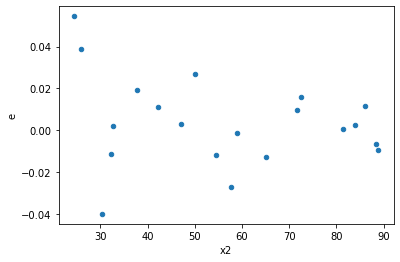

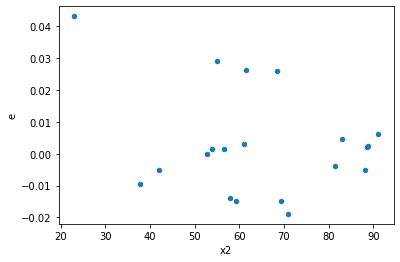

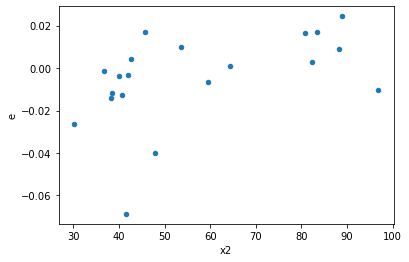

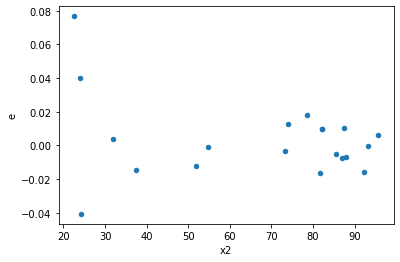

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,9.0,0.001950358914821899,0.007188273672103121,0.00027862270211741414,0.0007986970746781245,2.8665900826040596,0.14385069594255162,0.9280746520287242,0.07192534797127581,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,0.0018188704752484781,0.0031272360303701936,0.00020209671947205314,0.0004467480043385991,2.210565344680805,0.308203194256885,0.8458984028715575,0.1541015971284425,Reject001=1 : Homoscedasticity
2.0,6.0,10.0,0.000870162032128139,0.006063413416877517,0.00014502700535468983,0.0006063413416877517,4.180885761274833,0.04605597138067674,0.9769720143096616,0.02302798569033837,Reject001=1 : Homoscedasticity
4.0,10.0,6.0,0.0018270911199588353,0.005118289209788667,0.00018270911199588352,0.0008530482016314445,4.668887021084443,0.07258387291768398,0.963708063541158,0.03629193645884199,Reject001=1 : Homoscedasticity
9.0,7.0,9.0,0.0008755694950116255,0.00888793850599885,0.00012508135643023223,0.0009875487228887612,7.895251147516898,0.006159172189508011,0.996920413905246,0.0030795860947540055,Reject001=0 : Heteroscedasticity
11.0,7.0,9.0,0.0007468439095607088,0.007011122519109128,0.00010669198708010126,0.0007790136132343476,7.301519397604683,0.008137646235576446,0.9959311768822118,0.004068823117788223,Reject001=0 : Heteroscedasticity
12.0,12.0,4.0,0.0022944211873669722,0.003315984518937762,0.00019120176561391436,0.0008289961297344405,4.335713778963722,0.16827777051747628,0.9158611147412619,0.08413888525873814,Reject001=1 : Homoscedasticity
14.0,10.0,6.0,0.002660949866188851,0.0019907516674149274,0.0002660949866188851,0.00033179194456915456,1.2468928813167157,0.8197150322863336,0.5901424838568332,0.4098575161431668,Reject001=1 : Homoscedasticity
15.0,6.0,10.0,0.001891761335494154,0.003952247425145306,0.00031529355591569235,0.0003952247425145306,1.2535135434871094,0.715864572259115,0.6420677138704425,0.3579322861295575,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,0.001950358914821899,0.007188273672103121,0.00027862270211741414,0.0007986970746781245,2.8665900826040596,0.14385069594255162,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,0.0018188704752484781,0.0031272360303701936,0.00020209671947205314,0.0004467480043385991,2.210565344680805,0.308203194256885,Reject001=1 : Homoscedasticity
2.0,6.0,10.0,0.000870162032128139,0.006063413416877517,0.00014502700535468983,0.0006063413416877517,4.180885761274833,0.04605597138067674,Reject001=1 : Homoscedasticity
3.0,4.0,12.0,0.0012704906729888595,0.000811010910313777,0.0003176226682472149,6.758424252614809e-05,0.21278154641514857,0.14738873217234427,Reject001=1 : Homoscedasticity
4.0,10.0,6.0,0.0018270911199588353,0.005118289209788667,0.00018270911199588352,0.0008530482016314445,4.668887021084443,0.07258387291768398,Reject001=1 : Homoscedasticity
5.0,10.0,6.0,0.0028710351819810835,0.0005019074721861048,0.00028710351819810837,8.36512453643508e-05,0.29136266211349393,0.08330560671627298,Reject001=1 : Homoscedasticity
6.0,13.0,3.0,0.002596094412954857,9.105366129646161e-05,0.0001996995702272967,3.035122043215387e-05,0.15198440536255695,0.012151994844531036,Reject001=1 : Homoscedasticity
7.0,14.0,2.0,0.004149002385082447,3.911980845109042e-05,0.0002963573132201748,1.955990422554521e-05,0.06600108501798109,0.0006293995096595106,Reject001=0 : Heteroscedasticity
8.0,14.0,2.0,0.005859335614498189,6.77046080508002e-05,0.0004185239724641563,3.38523040254001e-05,0.0808849821100733,0.0016138788979183107,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      787
Reject001=0 : Heteroscedasticity    213
Name: Result_test, dtype: int64